# **5) WHO LIFE EXPECTANCY**

In [1052]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Utilizo la librería Pandas para abrir el archivo

In [1053]:
df = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/who_life_expectancy.csv")

Veo los primeros datos del dataset

In [1054]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [1055]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Renombro las columnas dado que algunas tenían un espacio adelante o atrás.

In [1056]:
df.rename(columns={
    "Life expectancy ": "Life_Expectancy",	
    "Adult Mortality": "Adult_Mortality",	
    "infant deaths": "Infant_Deaths",	
    "percentage expenditure": "Percentage_Expenditure",	
    "Hepatitis B": "Hepatitis_B",	
    "Measles ": "Measles", 
    " BMI ": "BMI", 
    "under-five deaths ": "Under_Five_Deaths",
    "Total expenditure": "Total_Expenditure",	
    " HIV/AIDS": "HIV/AIDS",
    "Diphtheria ": "Diphtheria",		
    " thinness  1-19 years": "Thinness_1-19_years",
    " thinness 5-9 years": "Thinness_5-9_years",
    "Income composition of resources": "Income_Composition_of_Resources"
    },
    inplace=True)

Vuelvo a probar el head para comprobar que el cambio de nombre se haya completado correctamente

In [1057]:
round(df.head(10), 2)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_Composition_of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.28,65.0,1154,...,6.0,8.16,65.0,0.1,584.26,33736494.0,17.2,17.3,0.48,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52,62.0,492,...,58.0,8.18,62.0,0.1,612.70,327582.0,17.5,17.5,0.48,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.22,64.0,430,...,62.0,8.13,64.0,0.1,631.74,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.18,67.0,2787,...,67.0,8.52,67.0,0.1,669.96,3696958.0,17.9,18.0,0.46,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.10,68.0,3013,...,68.0,7.87,68.0,0.1,63.54,2978599.0,18.2,18.2,0.45,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.68,66.0,1989,...,66.0,9.20,66.0,0.1,553.33,2883167.0,18.4,18.4,0.45,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.76,63.0,2861,...,63.0,9.42,63.0,0.1,445.89,284331.0,18.6,18.7,0.43,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.87,64.0,1599,...,64.0,8.33,64.0,0.1,373.36,2729431.0,18.8,18.9,0.43,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.91,63.0,1141,...,63.0,6.73,63.0,0.1,369.84,26616792.0,19.0,19.1,0.42,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.17,64.0,1990,...,58.0,7.43,58.0,0.1,272.56,2589345.0,19.2,19.3,0.40,8.1


Elimino strings

In [1058]:
wle = df.drop(["Country",	"Status"], axis=1)

# **A. ANÁLISIS CON VALORES NULOS ELIMINADOS**

Veo la dimensión del dataset.shape

In [1059]:
wle.shape

(2938, 20)

Sumo los valores nulos de cada columna antes de eliminar los nulos

In [1060]:
wle.isnull().sum()

Year                                 0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_Composition_of_Resources    167
Schooling                          163
dtype: int64

**ELIMINO LOS VALORES NULOS**

**Creo una variable para eliminar los nulos y no eliminarlos de todo el dataset para poder utilizar los nulos de la variable principal (wle) en el punto B**

In [1061]:
wle_notna = wle.dropna()

Veo la dimensión del dataset.shape con los valores nulos eliminados

In [1062]:
wle_notna.shape

(1649, 20)

Compruebo que se hayan eliminado

In [1063]:
wle_notna.isnull().sum()

Year                               0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_Composition_of_Resources    0
Schooling                          0
dtype: int64

Con el describe se puede ver un análisis estadístico rápido de las variables

In [1064]:
round(wle_notna.describe(), 2)

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_Composition_of_Resources,Schooling
count,1649.00,1649.0,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1649.00,1.649000e+03,1649.00,1649.00,1649.00,1649.00
mean,2007.84,69.3,168.22,32.55,4.53,698.97,79.22,2224.49,38.13,44.22,83.56,5.96,84.16,1.98,5566.03,1.465363e+07,4.85,4.91,0.63,12.12
std,4.09,8.8,125.31,120.85,4.03,1759.23,25.60,10085.80,19.75,162.90,22.45,2.30,21.58,6.03,11475.90,7.046039e+07,4.60,4.65,0.18,2.80
min,2000.00,44.0,1.00,0.00,0.01,0.00,2.00,0.00,2.00,0.00,3.00,0.74,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,4.20
25%,2005.00,64.4,77.00,1.00,0.81,37.44,74.00,0.00,19.50,1.00,81.00,4.41,82.00,0.10,462.15,1.918970e+05,1.60,1.70,0.51,10.30
50%,2008.00,71.7,148.00,3.00,3.79,145.10,89.00,15.00,43.70,4.00,93.00,5.84,92.00,0.10,1592.57,1.419631e+06,3.00,3.20,0.67,12.30
75%,2011.00,75.0,227.00,22.00,7.34,509.39,96.00,373.00,55.80,29.00,97.00,7.47,97.00,0.70,4718.51,7.658972e+06,7.10,7.10,0.75,14.00
max,2015.00,89.0,723.00,1600.00,17.87,18961.35,99.00,131441.00,77.10,2100.00,99.00,14.39,99.00,50.60,119172.74,1.293859e+09,27.20,28.20,0.94,20.70


HISTOGRAMA

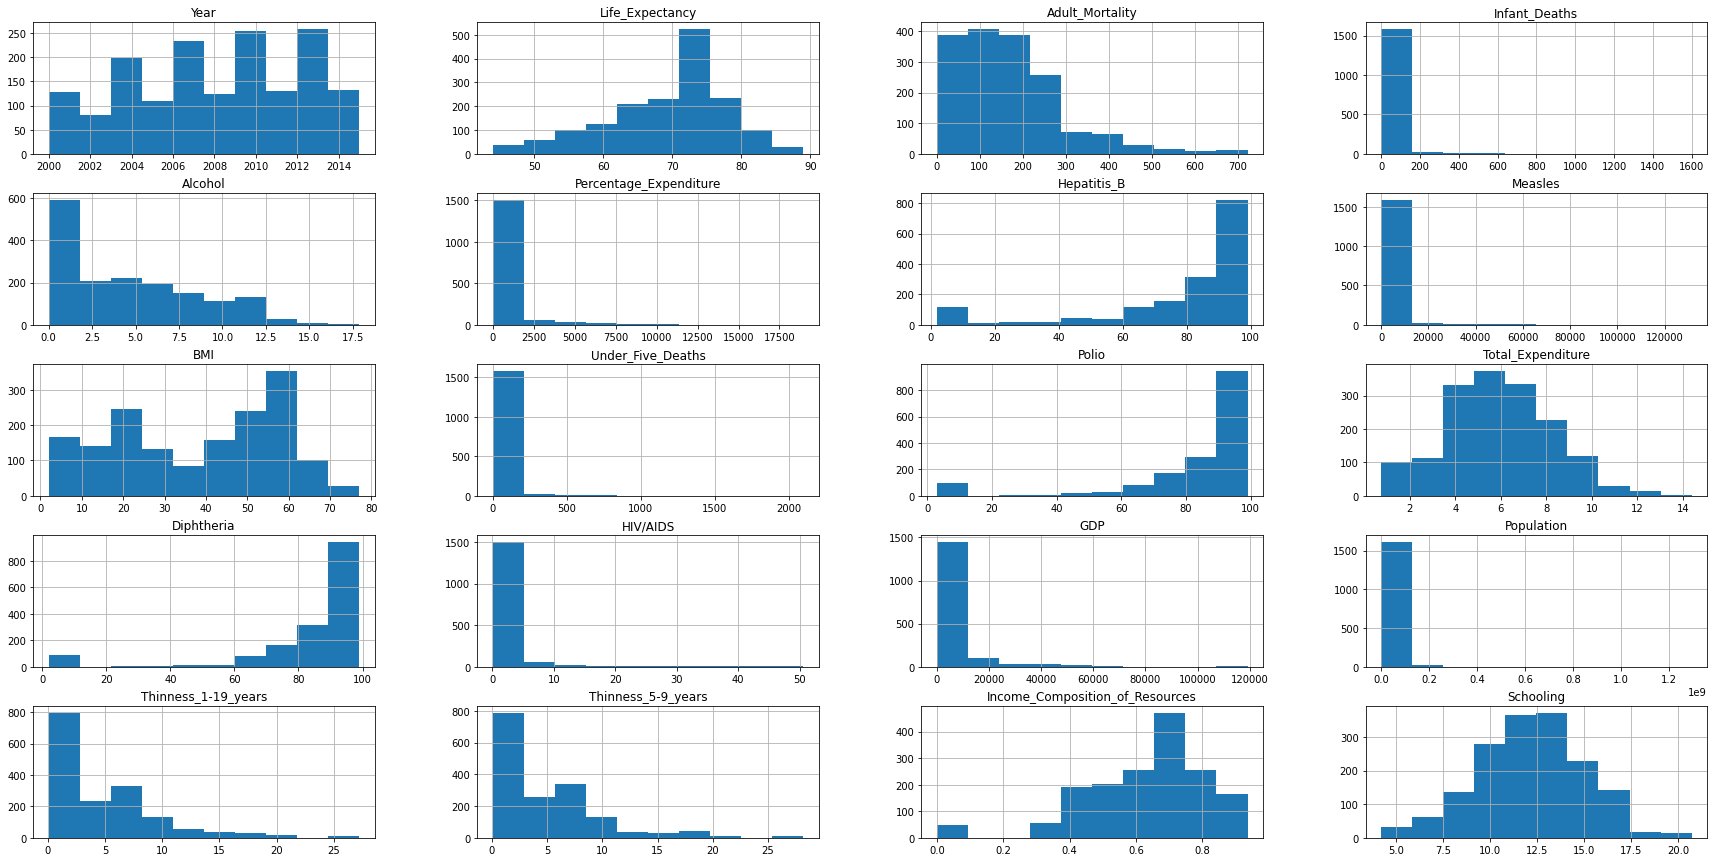

In [1065]:
wle_notna.hist(figsize=(30, 15));

MATRIZ DE CORRELACIÓN

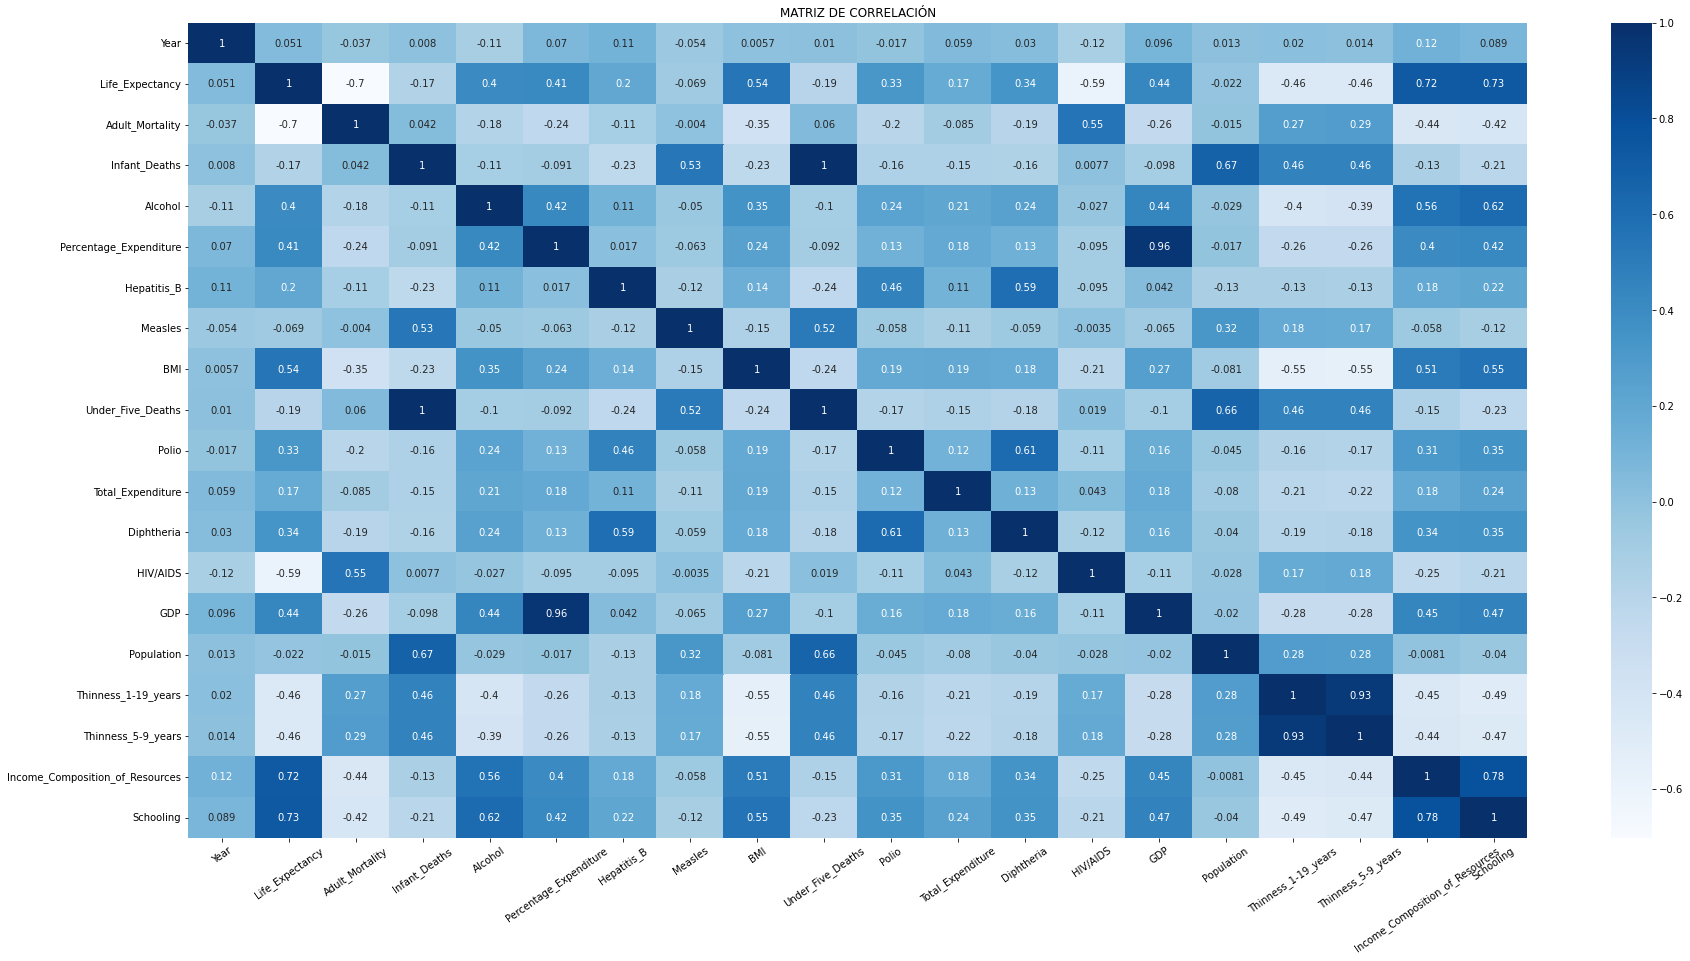

In [1066]:
plt.figure(figsize=(30,15))
plt.title("MATRIZ DE CORRELACIÓN");
ax = sns.heatmap(wle_notna.corr(),annot=True,cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)     
plt.show()

**OBSERVACIONES**:

Cuanto más oscuro es el color azul indica que la correlacion positiva será mayor.

Caso contrario, a medida que es más claro, la correlación negativa será mayor.

Dentro de las variables que se encuentran más correlacionadas positivamente se destacan:
*   Under_Five_Deaths con Percentage_Expenditure.
*   Percentage_Expenditure con GDP.
*   Thinness_1-19_years con Thinness_5-9_years.
*   Income_Composition_of_Resources	con Schooling.

Por otro las que más se correlacionan de forma negativa son las siguientes:
*   Life_Expectancy	con Adult_Mortality.
*   Life_Expectancy con HIV/AIDS.
*   HIV/AIDS	con Year.
*   Thinness_1-19_years con BMI.
*   Thinness_5-9_years con BMI.

# **B. REEMPLAZAR VALORES NULOS**

**DEFINO LAS VARIABLES DE LOS DATASETS PARA NORMALIZARLOS**

Elimino también del modelo dos columnas con strings y una con dates para normalizar el modelo

In [1067]:
x = wle_notna.drop("Population", axis=1)
y = wle_notna["Population"]
n, d = x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

El dataset tiene 1649 registros, de 19 dimensiones


**NORMALIZO**

In [1068]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

**ENTRENO EL MODELO DE REGRESIÓN LINEAL**

In [1069]:
lr.fit(x, y)

x_predict = wle.drop("Population", axis=1).dropna()

scaler = StandardScaler()
scaler.fit(x_predict)
x_predictn = scaler.transform(x_predict)

y_predict = lr.predict(x_predict)
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-6.68820110e+09, -2.91447496e+09, -2.64685286e+09, ...,
       -2.00101483e+09, -3.18509257e+09, -8.92576171e+09])

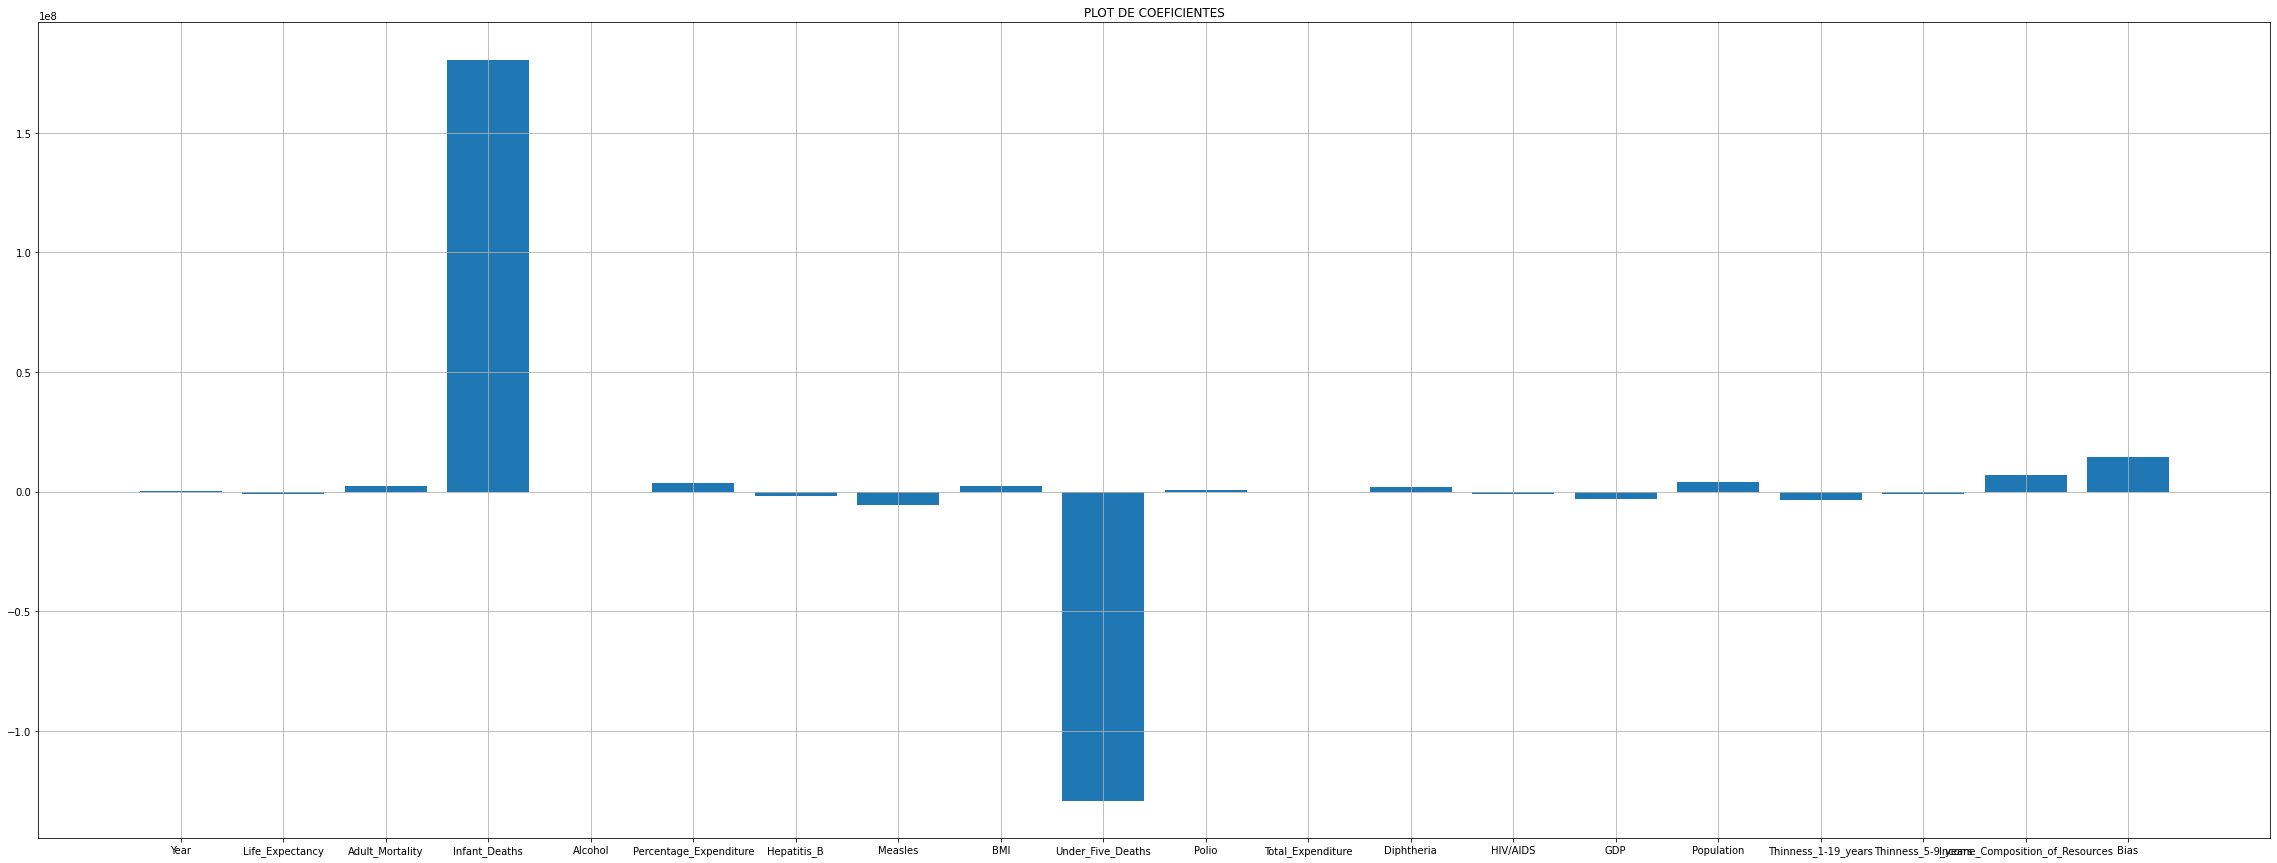

In [1070]:
w = lr.coef_
b = lr.intercept_
d = x.shape[1]

plt.figure(figsize=(40,15));
plt.bar(range(d+1), np.concatenate((w,[b])));
labels = wle_notna.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

Creo una variable nueva para limpiar todos los valores nulos (NaN) menos los de la variable a analizar ("Population").

In [1071]:
df_notnan = df.drop("Population",axis=1).dropna()

Utilizo index para obtener todas las filas predichas gracias a el modelo de regresión lineal.

In [1072]:
index = df_notnan.index
df_act = df.loc[index,:]

In [1073]:
print("La cantidad de errores en population son:", df["Population"].isnull().sum().sum())

La cantidad de errores en population son: 652


El modelo sólo podrá predecir los valores perdidos de la variable "Population"  que no contengan valores nulos en el resto de las variables.

In [1074]:
print("El modelo cuenta con la capacidad de predecir sólo", df_act.isnull().sum().sum(), "valores nulos de Population. Es decir, se perderán", (df['Population'].isnull().sum().sum())-(df_complete.isnull().sum().sum()), "filas.")

El modelo cuenta con la capacidad de predecir sólo 204 valores nulos de Population. Es decir, se perderán 652 filas.


**REEMPLAZO LOS VALORES PERDIDOS POR VALORES PREDICHOS**

Creo la variable final, que es una copia de los valores que podré predecir con mi modelo.

In [1075]:
df_newPoplation = df_act 

Reseteo el index para recuperar valores eliminados

In [1076]:
df_newPoplation.reset_index(inplace=True)

Creo una lista para guardar los valores.

In [1077]:
values_population = []

Genero la variable que utilizaré como contador para mi ciclo de iteración.

In [1078]:
contador = 0 #variable para ir recorriendo los valores dentro del y_predict

for value in df_act['Population']: 
    if(np.isnan(value)): 
        values_population.append(y_predict[contador]) # Si el valor del dataframe es nan entonces me quedo con el valor predecido
    else:
        values_population.append(value) # Si el valor no es nan entonces me quedo con el valor que ya tenia 
    contador += 1

# Agrego la lista creada al dataframe 
df_newPoplation.Population = pd.Series(values_population) 

Chequeo que no queden valores perdidos.

In [1079]:
df_newPoplation.isna().sum()

index                              0
Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_Composition_of_Resources    0
Schooling                          0
dtype: int64

In [1080]:
df_newPoplation

,index,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_Composition_of_Resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1849,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1850,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1851,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
